# Use python to see how Stockholm people tweets about IKEA

IKEA holds culture of contributing positive changes in society. In realitiy, how do people enjoy IKEA funiture, food and shopping experiences can be analyzed based on twitter data. Do Swedish hold positive opinions when they talk about IKEA? One quick way to answer this question is to collect their tweet texts including "IKEA". Opinion analysis (Sentiment analysis) can provide positive, negative or neutual outcome according to the words in sentence.

On September 1, 2007, there is new IKEA entry in Stockholm. We are very interested that whether this even call more tweets including "IKEA" from people and they are more happier due to this. Since Swedish people use Swedish instead of English. This make our study more challenge. Thus one important contribution in this paper is we also studied machine learning algorithm to fit sentiment analysis model by collecting Swedish corpus. To use supervised learning, previous study on other language use emoji information as target variable, such as smile or sad. We find Naive bayes perfroms best compare with other algorithms. Then we use it to apply our stockholm IKEA data.

Opinion analysis approaches in NLP (natural language processing) have been developed well for such purpose. However current research concentrated on English, a lack of Swedish study caused challenge in Swedish text mining. The goal of this paper is not only implement a series of sentiment analysis of IKEA in English, but also compare Machine leanring approach to figure out proper model for Swedish sentiment analysis so as to enable comparison study about IKEA public opinions. To make this study reproducible and developed further, below is how to do this analysis using Python.

The twitter data comes from September 2017 all over the world, only tweets including "IKEA" are downloaded. In addition, to have proper model for Swedish sentiment analysis, it is necessary to collect training data in advance which had been labeled as positive or negative. Previous study provided opinion labeled Swedish words list, but they are mannual work and very limited words in clinic field. Therefore, developing opinion model in data-driven way required machine learning algorithm to efficiently achieve this. Data size is 842836 records.


First, loading "tweepy" modules for twitter data collection requires OAuth information. Key and secret can be accessed by registering in twitter platform.

# Download twitter data

In [12]:
# -- coding: utf-8 --
# 1. download twitter data
import tweepy
import csv, os, re, sys
from datetime import date

consumer_key="0o565RnNoqXxedwPfopM827S0"
consumer_secret="Y7rPGwytdeP3q1jkzoWnD4zqSdUIBQI6ccgzNXvHlEqILk0Bdu"
access_token="901029362866192384-ftIJjx9erPpdzZI8ra1UMYlhe2VpDkt"
access_token_secret ="MNDmQ18fmgi0UVtCXqMrEAamRgGpCyFHsbqE4BSyZVkBy"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

Since only latest week of twitter data can be downloaded from twitter development rules, I have to collect data once a week. These file names had better be named according to date. If downloading more than one time in one day, the file name should be distinguished with each other. 

In [13]:
path = "/Users/Yujiao/Desktop/twitter_Ikea/Data/IKEA_database/"
filename = 'IKEA_' + str(date.today().month) + '_' + str(date.today().day) + '.csv'
filenameList = os.listdir(path)
count = 0
for x in filenameList:
    if re.findall(pattern= filename , string= x):
        count = count + 1
        
# Add extra file name in case of overwriting
if count!=0 :
    filename = str(count)+'_' + filename 
#print filename

Interested variables include user's ID, tweets content as well as the location and time of posting the tweet. Additional information about the user are also collected, such as how many friends and followers and so on.

In [5]:
# write data including interested variables
data_path = path + filename
f = open(data_path, 'wb')
csvWriter = csv.writer(f)

csvWriter.writerow(('user_id', 'user_location',  'tweet_text', 'tweet_created_at',
                    'tweet_retweet_count', 'user_statuses_count', 'user_followers_count',
                    'user_friends_count','tweet_place')) 

In [6]:
# set number j in items() below can only access j count of tweets.
# lang parameter sets language of retrieved tweets
# .items() set the count of items for downloading. Since we are retrieving all tweets including
# keyword as "IKEA", it is set as null hereby.

for tweet in tweepy.Cursor(api.search, q="IKEA",count=100,
                           #lang="en",
                           wait_on_rate_limit = True, wait_on_rate_limit_notify = True,
                           include_entities=True,
                           since=2017-9-10).items():  
    try:
        csvWriter.writerow((tweet.user.id, tweet.user.location.encode('utf-8'), tweet.text.encode('utf-8'), tweet.created_at,
        tweet.user.followers_count, tweet.user.friends_count, tweet.place))
        
    except tweepy.TweepError as e:  
        print(e.reason)
        sleep(900)
        continue

    except StopIteration: #stop iteration when last tweet is reached
        break

f.close()


# Data processing

The procedure of data processing are (1) Iterativley read twitter data which are sepratedly collected from 2017-08-21 to 2017-09-29; (2) Remove duplicated records; (3) Remove punctuations, websites, stopwords.


In [49]:
# Read twitter data .csv file collected from 2017-08-21 to 2017-09-29

import glob
import pandas as pd

# get data file names
path = r"/Users/Yujiao/Desktop/twitter_Ikea/Data/IKEA_database/"
filenames = glob.glob(path + "/*.csv")

In [48]:
# no need to run hereby,
# If you have only a few twitter data files to read.

frame = pd.DataFrame()
list_ = []
for file_ in filenames:
    df = pd.read_csv(file_,index_col=None, sep = ',')
    list_.append(df)
    
frame = pd.concat(list_)
IKEAdata = frame.drop_duplicates() # remove duplicated records
IKEAdata['tweet_text_clean'] = IKEAdata.tweet_text.str.replace("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|RT|via", " ")
#IKEAdata.to_csv(path + "IKEA_September.csv")

In [21]:
IKEA_data = pd.read_csv(path + "IKEA_September_Data.csv", index_col=None, sep = ',')

Which places are top 30 frequently talking about "IKEA" in tweets?

In [22]:
# print out top 50 cities which frequently talk about "IKEA"
new_df =  pd.value_counts(IKEA_data.user_location).reset_index()
new_df.columns = ['user_location', 'frequency']
top50_city = new_df.head(50)
new_df.head(10)

,user_location,frequency
0,"London, England",4579
1,London,4493
2,日本,3223
3,Malaysia,3045
4,United States,3023
5,France,2816
6,"Paris, France",2579
7,"Los Angeles, CA",2400
8,USA,2366
9,Madrid,2357


In [23]:
top50_city[(top50_city.user_location == "Sweden")| (top50_city.user_location == "New York, NY")]


,user_location,frequency
14,"New York, NY",1927
43,Sweden,860


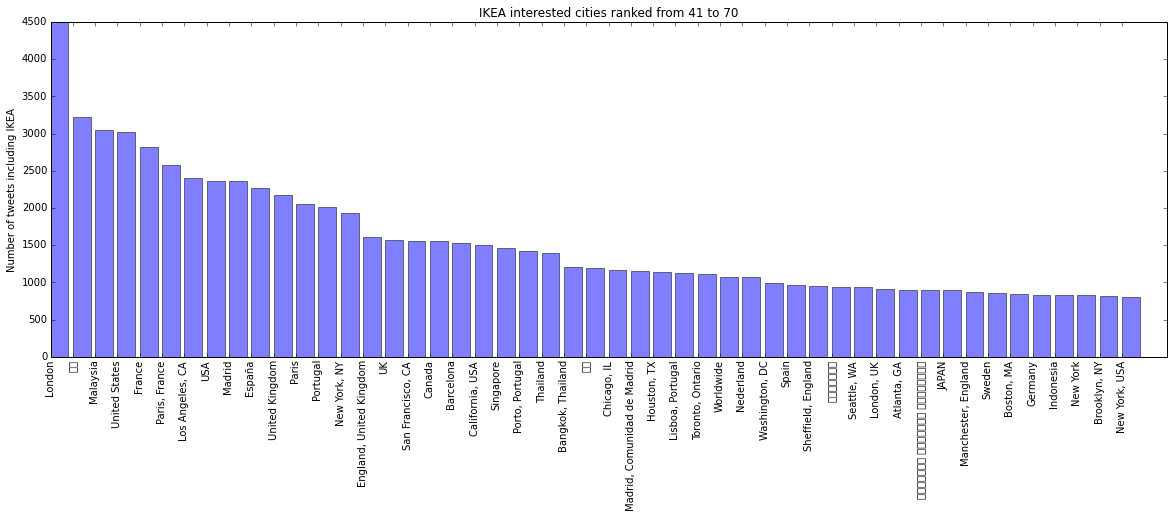

In [47]:
# -- coding: utf-8 --
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 6)
rcParams['text.latex.unicode']=True
# plt.bar(np.arange(len(top50_city.user_location)), top50_city.iloc[0:,1],  alpha=0.4)
# plt.xticks(y_pos, objects)


ranked_city = new_df.iloc[1:50,] # top 50 IKEA interested cities

objects = [x for x in ranked_city.user_location]
y_pos = np.arange(len(objects))
performance = ranked_city.iloc[0:,1]  
place = [unicode(x, 'utf-8') for x in ranked_city.user_location]
 
plt.bar(y_pos, performance,alpha=0.5)
plt.xticks(y_pos,place)
plt.xticks(rotation=90)
plt.ylabel('Number of tweets including IKEA')
plt.title('IKEA interested cities ranked from 41 to 70')


We ranked cities according to count of tweet including "IKEA" of individual cities. Note that twitter users register their own locations in different ways of written words, such as STOCKHOLM, Stockholm, stockholm, Sweden Stockholm. We used regular expression to solve this problem so that locations can be consistent no matter how they write it.

In [122]:
Stockholm_data = IKEA_data[(IKEA_data.user_location == "Stockholm")]
Gothenburg_data = IKEA_data[(IKEA_data.user_location == "Göteborg")]
USA_data = IKEA_data[IKEA_data.user_location == "USA"]
NY_data = IKEA_data[IKEA_data.user_location == "New York"]

Stockholm_data = pd.read_csv(path + "stockholm.csv")
# Gothenburg_data = pd.read_csv(path + "GothenburgData.csv")
USA_data = pd.read_csv(path + "USA_Data.csv")
NY_data = pd.read_csv(path + "NewYork_Data.csv")
Stockholm_data.shape

(1422, 10)

In [6]:
# Calculate how many times people talked about IKEA by following function 
pd.value_counts(Stockholm_data.tweet_created_at).reset_index()

# Applying same way, count data of other interested cities are saved as following dataset
countData = pd.read_csv(path + "countData.csv")
countData

,Unnamed: 0,stockholm,göteborg,oslo,norway,copenhagen,denmark,helsinki,new york,umeå,malmö
0,2017-08-24,3,0,1,1,2,2,0,20,0,0
1,2017-08-25,13,1,9,15,2,5,6,56,0,1
2,2017-08-26,18,3,8,7,7,7,4,54,0,1
3,2017-08-27,18,2,2,8,1,5,1,39,0,0
4,2017-08-28,6,2,5,11,5,9,4,58,0,5
5,2017-08-29,33,3,5,13,3,4,5,69,1,3
6,2017-08-30,20,2,5,16,13,12,10,94,0,2
7,2017-08-31,51,1,5,6,4,4,9,117,9,9
8,2017-09-01,57,10,4,12,10,8,9,119,0,10
9,2017-09-02,58,8,8,18,9,9,4,76,2,10


This table shows that as time goes how people increase or decrese their talk about "IKEA"

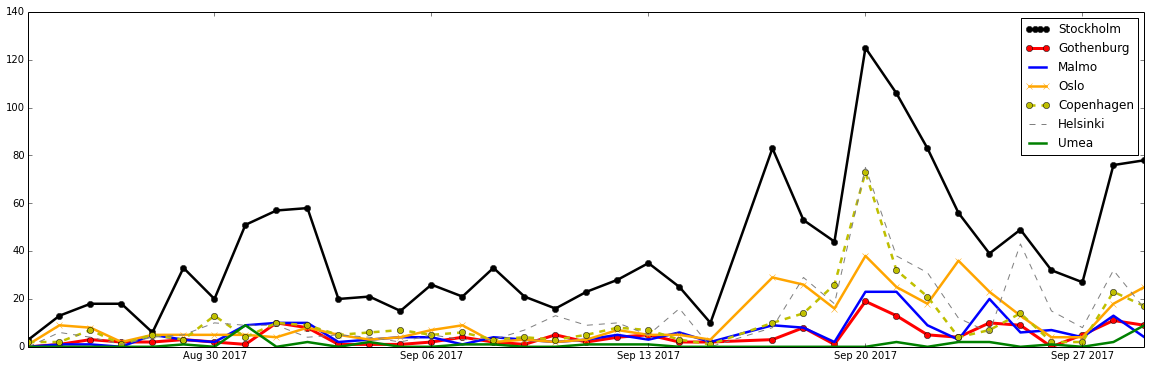

In [51]:
%matplotlib inline
rcParams['figure.figsize'] = (20, 6) # set width of figure

from matplotlib.legend_handler import HandlerLine2D
#countData.plot(x=countData.iloc[0:,0], y=countData.stockholm)
dates = countData.iloc[0:,0]
x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]
line1, =plt.plot(x, countData.stockholm, label="Stockholm", linestyle='-',linewidth=2.5, color='black',marker='o')
line2, =plt.plot(x, countData.iloc[0:,2],label="Gothenburg", linestyle='-',linewidth=3,color='red',marker='o')
line3, =plt.plot(x, countData.iloc[0:,10], linestyle='-',label = "Malmo",linewidth=2.5,color = "blue")
line4, =plt.plot(x, countData.iloc[0:,3],label="Oslo", linestyle='-',linewidth=2.5,color='orange',marker='x')
#line5, =plt.plot(x, countData.iloc[0:,4], linestyle='--',color = "gray")
line6,= plt.plot(x, countData.iloc[0:,5],label="Copenhagen", color='y',marker='o', linewidth=2.5,linestyle="--")
#plt.plot(x, countData.iloc[0:,6], linestyle='--',color = "gray")
plt.plot(x, countData.iloc[0:,7], linestyle='--',color = "gray", label ="Helsinki")
#plt.plot(x, countData.iloc[0:,8], linestyle='--')
plt.plot(x, countData.iloc[0:,9], label = "Umea", linestyle="-", linewidth=2.5,color = "green")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})



On Sep 1, 2017, new IKEA opened in Stockholm. That can explain the sudden increasment of tweets count including "IKEA". Their interests are higher than Oslo, Copenhagen and Helsinki.

In [116]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import HTMLParser
from nltk import word_tokenize

html_parser = HTMLParser.HTMLParser()
tweets = ' '.join(Stockholm_data['tweet_text_clean'])
tweets = html_parser.unescape(tweets)
stopset = pd.read_csv("https://raw.githubusercontent.com/stopwords-iso/stopwords-sv/master/stopwords-sv.txt", 
                      header=0, encoding='utf-8')['aderton']#idx = 150 # Some random index between 0, 199
stoplist = stopset.tolist()

reformed = [stoplist[word] if word in stopset else word for word in tweets]
reformed = " ".join(reformed)

# reformed = [appos[word] if word in appos else word for word in tweets]
# reformed = " ".join(reformed)
filtered_words = [i for i in word_tokenize(tweets.lower())]
# join tweets to a single string
words = ' '.join(filtered_words)
                          

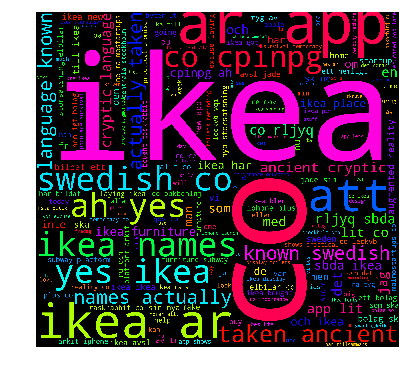

In [125]:
wordcloud = WordCloud(background_color='black',
                      width=5200,
                      height=4800
                     ).generate(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./my_twitter_wordcloud_SV.png', dpi=800)
plt.show()


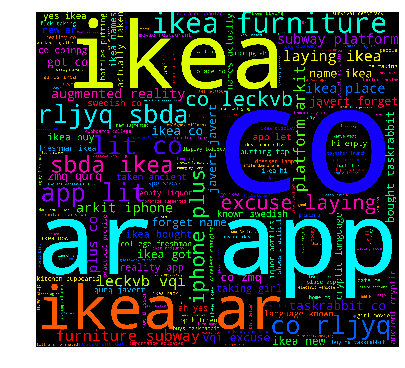

In [124]:
tweetsNY = ' '.join(NY_data['tweet_text_clean'])
tweetsNY = html_parser.unescape(tweetsNY)


# reformed = [appos[word] if word in appos else word for word in tweets]
# reformed = " ".join(reformed)
filtered_wordsNY = [i for i in word_tokenize(tweetsNY.lower())]
# join tweets to a single string
wordsNY = ' '.join(filtered_wordsNY)

wordcloudNY = WordCloud(background_color='black',
                      width=5200,
                      height=4800
                     ).generate(wordsNY)

plt.imshow(wordcloudNY)
plt.axis('off')
plt.savefig('./my_twitter_wordcloud_NY.png', dpi=800)
plt.show()

# Sentiment analysis
TextBlob is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis. We will apply it in English test analysis.

In [53]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')
from textblob import TextBlob

In [54]:
def Score(words):
    tweet_text = TextBlob(words)
    tweet_lang = tweet_text.detect_language()
    
    if tweet_lang == "en":
        tweet_en = tweet_text
        
    if tweet_lang!= "en":
        try:
            tweet_en = tweet_text.translate(from_lang = tweet_lang, to = "en")
            
        except Exception: 
            tweet_en = tweet_text

    return  [str(tweet_en), tweet_en.sentiment.polarity, tweet_en.sentiment.subjectivity]


In [62]:
# It takes long time to run this due to data size. Hereby, you can try the test sample.
test = Stockholm_data.tweet_text_clean[1:10,]
test
tweet_score =  test.apply(lambda x: pd.Series({'tweet_en':Score(x)[0], 'tweet_en_polarity':Score(x)[1], 'tweet_en_subjectivity':Score(x)[2]}))
tweet_score

#tweet_score =  Stockholm_data.tweet_text_clean.apply(lambda x: pd.Series({'tweet_en':Score(x)[0], 'tweet_en_polarity':Score(x)[1], 'tweet_en_subjectivity':Score(x)[2]}))

#Stockholm_data_en = pd.concat([Stockholm_data, tweet_score], axis=1)
#data_IKEA_sv.to_csv("Stockholm_en.csv", sep = ",")

,tweet_en,tweet_en_polarity,tweet_en_subjectivity
1,Haha I have way to many But then I live in...,0.278788,0.433333
2,Yeah me too feels like most of my furniture a...,0.500000,0.500000
3,Just a simple one from IKEA Think it s calle...,0.000000,0.357143
4,i thought ikea had the same assortment everywh...,0.000000,0.125000
5,IKEA has me thinking about how I m going to...,0.000000,0.000000
6,It s a mistake to think of India as poor It d...,0.033333,0.700000
7,Flexed out really early today and went to IKEA...,0.100000,0.300000
8,As if not getting the IKEA catalog in the mail...,0.000000,0.500000
9,eastern construction company built in ikea Öst...,0.000000,0.000000


As we can see that grading polarity (mood) based on translated English from Swedish can cause a big problem that is it can only get 0 most of the time. Then we are driven to think how to score sentence's opinion based on Swedish. NLP (natural language processing) in Swedish is lack of study and it requires appropriate approach to deal with Swedish language directly instead of translation into English in advance. Especially, current translation system is not satisfied. In this paper, we compare different machine learning and statistical models to find proper way to implement sentiment analysis in tweets and apply it in IKEA’s opinion analysis of Swedish residences. Our contributions are: in methodology, we compared and studied different approaches in Swedish sentiment analysis; and in empirical study, we analyze people’s opinion on IKEA entry in Stockholm.

Michelle Ludovici (2015, 2016) studied sentiment analysis of Swedish texts based on articles which considered SVM and Bayes. But these previous analysis and parameter optimization are discovered very briefly. On the other hand, twitter text, as short texts, cannot apply study approach of articles. Twitter messages have many unique attributes, which differentiates our research from previous research: Length The maximum length of a Twitter message, Data availability, Language model and domain twitter users characteristics (A. Go, R. Bhayanim, L. Huang, 2009). 